# Exercise 1 

In this exercise, we will keep practicing regression with `TensorFlow`.

### Exercise 1(a) (2 points)

Load the following libraries.

```
import pandas as pd 
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf
```

In [2]:
import pandas as pd 
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold

import tensorflow as tf

### Exercise 1(b) (2 points)

Read the `CrabAgePrediction.csv` data file and create a data frame called `crab`. The dataset is used to estimate the age of the crab based on the physical attributes. 

In [3]:
crab = pd.read_csv('CrabAgePrediction.csv')
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


### Exercise 1(c) (2 points)

Report the frequency table of `Sex`.

In [4]:
crab['Sex'].value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

### Exercise 1(d) (3 points)

Create a histogram of `Age`. Describe the chart.

<AxesSubplot:>

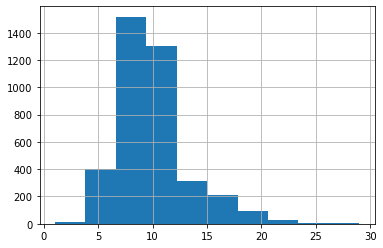

In [5]:
crab['Age'].hist()

The above chart is slightly right skewed.

### Exercise 1(e) (4 points)

Using `get_dummies` from `pandas` to convert `Sex` into a 0-1 columns. Append the 0-1 column to the `crab` data frame and then drop the `Sex` column.

In [6]:
dummies = pd.get_dummies(crab['Sex'], dtype=float, drop_first=True)

crab = pd.concat([crab, dummies], axis=1)
crab = crab.drop(columns=['Sex'], axis=1)
crab.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,I,M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1.0,0.0


### Exercise 1(f) (4 points)

Define `Age` as the target feature, and the other features as the input features. Then, split the data into `train` (80%) and `test` (20%.)

In [7]:
x = crab.drop(columns=['Age'], axis=1)
y = crab['Age']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Exercise 1(g) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 16 neurons and `relu` as the activation function.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanAbsoluteError'`.
- Build the model on the `train` data, with `epochs=30` and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [8]:
md_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape = (9,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='MeanAbsoluteError')

md_1.fit(x_train, y_train, epochs=20, validation_split=.1)

Epoch 1/20
88/88 [==============================] - 1s 3ms/step - loss: 2.0715 - val_loss: 1.9287
Epoch 2/20
88/88 [==============================] - 0s 1ms/step - loss: 1.7510 - val_loss: 1.5144
Epoch 3/20
88/88 [==============================] - 0s 2ms/step - loss: 1.6929 - val_loss: 1.7492
Epoch 4/20
88/88 [==============================] - 0s 2ms/step - loss: 1.7366 - val_loss: 1.4910
Epoch 5/20
88/88 [==============================] - 0s 2ms/step - loss: 1.6755 - val_loss: 1.5288
Epoch 6/20
88/88 [==============================] - 0s 1ms/step - loss: 1.6798 - val_loss: 1.5263
Epoch 7/20
88/88 [==============================] - 0s 1ms/step - loss: 1.6335 - val_loss: 1.4986
Epoch 8/20
88/88 [==============================] - 0s 1ms/step - loss: 1.6857 - val_loss: 1.5209
Epoch 9/20
88/88 [==============================] - 0s 1ms/step - loss: 1.6494 - val_loss: 1.7732
Epoch 10/20
88/88 [==============================] - 0s 2ms/step - loss: 1.7051 - val_loss: 1.6221
Epoch 11/20
88/88 [

### Exercise 1(h) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 16 neurons and `relu` as the activation function. Make sure to include `BatchNormalization()`
before the first layer.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanAbsoluteError'`.
- Build the model on the `train` data, with `epochs=30` and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [9]:
md_2 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, input_shape = (9,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='MeanAbsoluteError')

md_2.fit(x_train, y_train, epochs=20, validation_split=.1)

Epoch 1/20
88/88 [==============================] - 1s 3ms/step - loss: 9.2416 - val_loss: 2.5535
Epoch 2/20
88/88 [==============================] - 0s 1ms/step - loss: 2.0838 - val_loss: 1.6230
Epoch 3/20
88/88 [==============================] - 0s 1ms/step - loss: 1.7792 - val_loss: 1.8506
Epoch 4/20
88/88 [==============================] - 0s 2ms/step - loss: 1.8245 - val_loss: 1.7719
Epoch 5/20
88/88 [==============================] - 0s 1ms/step - loss: 1.7212 - val_loss: 1.5829
Epoch 6/20
88/88 [==============================] - 0s 1ms/step - loss: 1.7742 - val_loss: 1.6302
Epoch 7/20
88/88 [==============================] - 0s 2ms/step - loss: 1.6939 - val_loss: 1.6659
Epoch 8/20
88/88 [==============================] - 0s 2ms/step - loss: 1.6905 - val_loss: 1.5412
Epoch 9/20
88/88 [==============================] - 0s 2ms/step - loss: 1.7411 - val_loss: 1.5529
Epoch 10/20
88/88 [==============================] - 0s 1ms/step - loss: 1.7026 - val_loss: 1.5237
Epoch 11/20
88/88 [

### Exercise 1(i) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 16 neurons and `relu` as the activation function.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanAbsoluteError'`.
- Build the model on the `train` data, with `epochs=30`, `batch_size=64`, and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [10]:
md_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape = (9,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='MeanAbsoluteError')

md_3.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=.1)

Epoch 1/30
44/44 [==============================] - 1s 4ms/step - loss: 3.4988 - val_loss: 1.5538
Epoch 2/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6971 - val_loss: 2.1033
Epoch 3/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6906 - val_loss: 1.4407
Epoch 4/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6634 - val_loss: 1.4339
Epoch 5/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6513 - val_loss: 1.6448
Epoch 6/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6166 - val_loss: 1.4132
Epoch 7/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6261 - val_loss: 1.4222
Epoch 8/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6311 - val_loss: 1.4225
Epoch 9/30
44/44 [==============================] - 0s 2ms/step - loss: 1.5809 - val_loss: 1.4047
Epoch 10/30
44/44 [==============================] - 0s 2ms/step - loss: 1.5732 - val_loss: 1.5150
Epoch 11/30
44/44 [

### Exercise 1(j) (6 points)

Build a neural network and evaluate it as follows:

- Define a network with 2 layers of 16 neurons and `relu` as the activation function. Make sure to include `BatchNormalization()`
before the first layer.
- Compile the model with `optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)`, and `loss='MeanAbsoluteError'`.
- Build the model on the `train` data, with `epochs=30`, `batch_size=64`, and `validation_split=0.1`.
- Evaluate the model in the `test` data.

In [11]:
md_4 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, input_shape = (9,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

md_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='MeanAbsoluteError')

md_4.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=.1)

Epoch 1/30
44/44 [==============================] - 1s 4ms/step - loss: 2.7266 - val_loss: 2.3897
Epoch 2/30
44/44 [==============================] - 0s 2ms/step - loss: 1.7887 - val_loss: 1.7573
Epoch 3/30
44/44 [==============================] - 0s 2ms/step - loss: 1.8015 - val_loss: 1.7019
Epoch 4/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6939 - val_loss: 1.7644
Epoch 5/30
44/44 [==============================] - 0s 2ms/step - loss: 1.7402 - val_loss: 1.6843
Epoch 6/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6957 - val_loss: 1.7268
Epoch 7/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6643 - val_loss: 1.5444
Epoch 8/30
44/44 [==============================] - 0s 2ms/step - loss: 1.6728 - val_loss: 1.5592
Epoch 9/30
44/44 [==============================] - 0s 2ms/step - loss: 1.7390 - val_loss: 2.1045
Epoch 10/30
44/44 [==============================] - 0s 2ms/step - loss: 1.8093 - val_loss: 1.7323
Epoch 11/30
44/44 [

### Exercise 1(k) (2 points)

Using the results from parts 1(g) to 1(j), what model would use to predict `Age`?

In [12]:
MAE = md_1.evaluate(x_test, y_test)
print(f'md_1 MAE:{MAE}')
MAE = md_2.evaluate(x_test, y_test)
print(f'md_2 MAE:{MAE}')
MAE = md_3.evaluate(x_test, y_test)
print(f'md_3 MAE:{MAE}')
MAE = md_4.evaluate(x_test, y_test)
print(f'md_4 MAE:{MAE}')

25/25 [==============================] - 0s 955us/step - loss: 1.4886
md_1 MAE:1.488552451133728
25/25 [==============================] - 0s 957us/step - loss: 1.6686
md_2 MAE:1.6686347723007202
25/25 [==============================] - 0s 881us/step - loss: 1.7497
md_3 MAE:1.749675989151001
25/25 [==============================] - 0s 926us/step - loss: 1.6196
md_4 MAE:1.6195704936981201


I would use model 1 to predict crab age because it has the lowest MAE

# Exercise 2 

In this exercise, we will practice cross-validation with the model from parts 1(g) to 1(j). \

### Exercise 2(a) (2 points)

First, let's define the cross-validation strategy as follows:

```
skf = KFold(n_splits=5, shuffle=True, random_state=10)
```

In [13]:
skf = KFold(n_splits=5, shuffle=True, random_state=10)

### Exercise 2(b) (6 points)

Compute the out-of-fold performance of the model from part 1(g) over the cros-validation strategy from part 2(a). Report the out-of-fold average mean absolute error.

In [16]:
mae_scores_1 = list()

for i, (train_idx, test_idx) in enumerate(skf.split(x,y)):
    x_train, x_test = x.loc[train_idx], x.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    
    md_1.fit(x_train, y_train, epochs=20, verbose = 0)
    md_1_pred = md_1.predict(x_test, verbose=0)
    
    mae = mean_absolute_error(y_test, md_1_pred)
    mae_scores_1.append(mae)
    
    print(f'Fold {i} MAE is {mae}')
    
print(f'the 5-fold oof MAE is {np.mean(mae_scores_1)}')

Fold 0 MAE is 1.6813887766298188
Fold 1 MAE is 1.7032175143661792
Fold 2 MAE is 1.614536186849964
Fold 3 MAE is 1.618501766788316
Fold 4 MAE is 1.5275897526189417
the 5-fold oof MAE is 1.629046799450644


### Exercise 2(c) (6 points)

Compute the out-of-fold performance of the model from part 1(h) over the cros-validation strategy from part 2(a). Report the out-of-fold average mean absolute error.

In [18]:
mae_scores_2 = list()

for i, (train_idx, test_idx) in enumerate(skf.split(x,y)):
    x_train, x_test = x.loc[train_idx], x.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    
    md_2.fit(x_train, y_train, epochs=20, verbose = 0)
    md_2_pred = md_1.predict(x_test, verbose=0)
    
    mae = mean_absolute_error(y_test, md_2_pred)
    mae_scores_2.append(mae)
    
    print(f'Fold {i} MAE is {mae}')
    
print(f'the 5-fold oof MAE is {np.mean(mae_scores_2)}')

Fold 0 MAE is 1.6348047727797854
Fold 1 MAE is 1.6223840560472365
Fold 2 MAE is 1.624155141881862
Fold 3 MAE is 1.6050837046076523
Fold 4 MAE is 1.5275897526189417
the 5-fold oof MAE is 1.6028034855870956


### Exercise 2(d) (6 points)

Compute the out-of-fold performance of the model from part 1(i) over the cros-validation strategy from part 2(a). Report the out-of-fold average mean absolute error.

In [19]:
mae_scores_3 = list()

for i, (train_idx, test_idx) in enumerate(skf.split(x,y)):
    x_train, x_test = x.loc[train_idx], x.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    
    md_3.fit(x_train, y_train, epochs=20, verbose = 0)
    md_3_pred = md_3.predict(x_test, verbose=0)
    
    mae = mean_absolute_error(y_test, md_3_pred)
    mae_scores_3.append(mae)
    
    print(f'Fold {i} MAE is {mae}')
    
print(f'the 5-fold oof MAE is {np.mean(mae_scores_3)}')

Fold 0 MAE is 1.585452764729021
Fold 1 MAE is 1.8660818168532405
Fold 2 MAE is 1.6507628003807215
Fold 3 MAE is 1.5928152152995523
Fold 4 MAE is 1.5179984073099564
the 5-fold oof MAE is 1.6426222009144982


### Exercise 2(e) (6 points)

Compute the out-of-fold performance of the model from part 1(j) over the cros-validation strategy from part 2(a). Report the out-of-fold average mean absolute error.

In [20]:
mae_scores_4 = list()

for i, (train_idx, test_idx) in enumerate(skf.split(x,y)):
    x_train, x_test = x.loc[train_idx], x.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    
    md_4.fit(x_train, y_train, epochs=20, verbose = 0)
    md_4_pred = md_4.predict(x_test, verbose=0)
    
    mae = mean_absolute_error(y_test, md_4_pred)
    mae_scores_4.append(mae)
    
    print(f'Fold {i} MAE is {mae}')
    
print(f'the 5-fold oof MAE is {np.mean(mae_scores_4)}')

Fold 0 MAE is 1.912333685565209
Fold 1 MAE is 1.6080220972925463
Fold 2 MAE is 1.6696748666187917
Fold 3 MAE is 1.6125851823615538
Fold 4 MAE is 1.652995288525265
the 5-fold oof MAE is 1.6911222240726733


### Exercise 2(f) (2 points)

Based on the results from parts 2(b) to 2(e), what model would use to predict `Age`?

Based on the above results I would use model 2 because it had the lowest MAE